In [2]:
#Importaciones basicas
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
# graficos incrustados
%matplotlib inline

In [3]:
BBVA_data = pd.read_csv('clientes_procesado.csv', header=0)
BBVA_data.shape

(70000, 53)

In [4]:
BBVA_data.ix[:100, :54]

,ID_CORRELATIVO,CODMES,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,ATTRITION,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,...,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
0,35653,201208,1,Rang_ingreso_06,Lima,25.000000,6.000000,0,Rango_SDO_09,0,...,1,1,1,1,1,0,0,0,0,0
1,66575,201208,1,Rang_ingreso_03,Provincia,27.000000,0.000000,0,Rango_SDO_01,0,...,1,1,1,1,0,0,0,0,0,0
2,56800,201208,1,Rang_ingreso_01,Provincia,34.000000,4.000000,0,Rango_SDO_02,0,...,0,0,0,0,0,0,0,0,0,0
3,8410,201208,1,Rang_ingreso_04,Provincia,63.000000,5.000000,0,Rango_SDO_03,0,...,3,3,3,3,1,1,1,1,1,1
4,6853,201208,1,Rang_ingreso_01,Lima,25.000000,0.000000,0,Rango_SDO_01,0,...,0,0,0,0,0,0,0,0,0,0
5,22240,201208,0,Rang_ingreso_02,Lima,27.000000,0.000000,0,Rango_SDO_01,0,...,0,0,0,0,0,0,0,0,0,0
6,86930,201208,1,Rang_ingreso_04,Provincia,41.000000,0.000000,0,Cero,0,...,3,2,2,2,1,1,1,1,1,1
7,88272,201208,0,Rang_ingreso_01,Provincia,23.000000,0.000000,0,Rango_SDO_08,0,...,0,0,0,0,0,0,0,0,0,0
8,94608,201208,0,Rang_ingreso_01,Lima,35.232474,0.000000,0,Cero,0,...,0,0,0,0,0,0,0,0,0,0
9,26877,201208,1,Rang_ingreso_06,Lima,26.000000,7.000000,0,Rango_SDO_07,0,...,5,5,5,5,0,1,0,1,1,1


In [5]:
BBVA_data.isnull().any().any()

False

In [6]:
BBVA_data.shape

(70000, 53)

In [7]:
BBVA_data = BBVA_data.dropna()

In [8]:
BBVA_data.shape

(70000, 53)

In [9]:
from sklearn.decomposition import PCA
entrenar = BBVA_data.drop(['ID_CORRELATIVO', 'ATTRITION'], axis=1)
entrenar.shape

(70000, 51)

In [10]:
# Separamos las columnas objetivo
columna_artitrion = BBVA_data['ATTRITION']
columna_id = BBVA_data['ID_CORRELATIVO']

In [11]:
# Agregando la columna AGE2
EDAD2 = pd.cut(entrenar['EDAD'], range(0, 150, 10))
entrenar['EDAD'] = EDAD2

In [12]:
entrenar['EDAD'], _ = pd.factorize(entrenar['EDAD'])
#Factorizar los datos categoricos
tipos = entrenar.columns.to_series().groupby(entrenar.dtypes).groups
ctext = tipos[np.dtype('object')]
for c in ctext:
    entrenar[c], _ = pd.factorize(entrenar[c])

Feature ranking:
1. feature 6 (0.097600)
2. feature 33 (0.083086)
3. feature 34 (0.073395)
4. feature 5 (0.065058)
5. feature 4 (0.057842)
6. feature 2 (0.054341)
7. feature 35 (0.049544)
8. feature 36 (0.038198)
9. feature 40 (0.024982)
10. feature 39 (0.024167)
11. feature 37 (0.022162)
12. feature 44 (0.021087)
13. feature 43 (0.021035)
14. feature 20 (0.019805)
15. feature 21 (0.019760)
16. feature 27 (0.019410)
17. feature 3 (0.018972)
18. feature 19 (0.018795)
19. feature 38 (0.018027)
20. feature 15 (0.016446)
21. feature 42 (0.015851)
22. feature 22 (0.015745)
23. feature 41 (0.014909)
24. feature 28 (0.014504)
25. feature 7 (0.012868)
26. feature 18 (0.012508)
27. feature 23 (0.011067)
28. feature 45 (0.009474)
29. feature 8 (0.009036)
30. feature 13 (0.008545)
31. feature 29 (0.008347)
32. feature 24 (0.008123)
33. feature 25 (0.007427)
34. feature 9 (0.007120)
35. feature 14 (0.006791)
36. feature 10 (0.006483)
37. feature 50 (0.006432)
38. feature 12 (0.006318)
39. feature 

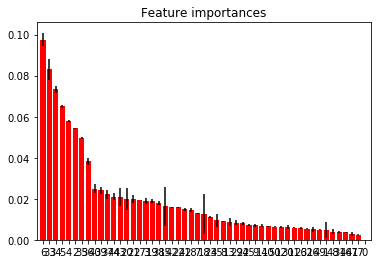

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
X = entrenar
forest = ExtraTreesClassifier(n_estimators=2, random_state=0)
forest.fit(entrenar, columna_artitrion)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [14]:
# Algoritmo de Eliminación Recursiva de atributos con ExtraTrees
from sklearn.feature_selection import RFE
columnas = list(entrenar.columns.values)
era = RFE(ExtraTreesClassifier(), 25)  # número de atributos a seleccionar
era = era.fit(entrenar, columna_artitrion)
# imprimir resultados
atrib = era.support_
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos

['RANG_INGRESO',
 'EDAD',
 'ANTIGUEDAD',
 'RANG_SDO_PASIVO_MENOS0',
 'SDO_ACTIVO_MENOS0',
 'SDO_ACTIVO_MENOS1',
 'FLG_SEGURO_MENOS2',
 'RANG_NRO_PRODUCTOS_MENOS0',
 'NRO_ACCES_CANAL1_MENOS0',
 'NRO_ACCES_CANAL1_MENOS1',
 'NRO_ACCES_CANAL1_MENOS2',
 'NRO_ACCES_CANAL2_MENOS0',
 'NRO_ACCES_CANAL2_MENOS1',
 'NRO_ACCES_CANAL3_MENOS0',
 'NRO_ACCES_CANAL3_MENOS1',
 'NRO_ACCES_CANAL3_MENOS2',
 'NRO_ACCES_CANAL3_MENOS3',
 'NRO_ACCES_CANAL3_MENOS4',
 'NRO_ACCES_CANAL3_MENOS5',
 'NRO_ENTID_SSFF_MENOS0',
 'NRO_ENTID_SSFF_MENOS1',
 'NRO_ENTID_SSFF_MENOS2',
 'NRO_ENTID_SSFF_MENOS3',
 'NRO_ENTID_SSFF_MENOS4',
 'NRO_ENTID_SSFF_MENOS5']

In [14]:
# Guardando el dataset preprocesado
entrenar.to_csv("clientes_train.csv", index=False)